# Corpus size analysis
This notebook explores the effect of training corpus size on model performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
from os import listdir
import json
from ast import literal_eval
import numpy as np

In order to get the data visualizeds in this notebook, the following algorithm was used:

```
for model in models:
    initial_train = pick 150 random docs
    test = pick 30 random docs
    dev = pick 20 random docs
    for subset_num in range(7):
        train = initial_train + 50 more random docs
        train model
        evaluate model
```
Documents were sampled without replacement, and there are no overlaps between any sets.

 ## Loading the data

Read in the test performance files:

In [2]:
test_perf_prefix = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/corpus_size_analysis/performance/'
test_perf_paths = {
    'bioinfer': 'bioinfer_by_tens_perf.csv',
    'chemprot': 'chemprot_by_tens_perf.csv',
    'scierc': 'scierc_by_tens_perf.csv',
    'genia': 'genia_by_tens_perf.csv',
    'pickle': 'pickle_by_tens_perf.csv'
}
test_perf_dfs = {k: pd.read_csv(f'{test_perf_prefix}{v}') for k,v in test_perf_paths.items()}

Read in the reported validation scores:

In [3]:
# def get_val_perfs(model_path, dset_name):
#     """
#     Get the reported mean validation F1 scores for a given set of models.

#     parameters:
#         model_path, str: path to models
#         dset_name, str: name of dataset, should be substring at the beginning
#             of the models of interest

#     returns:
#         val_perfs, df: rows are models, columns are ent and rel perfs
#     """
#     val_perfs_dict = {'model': [], 'ent_F1': [], 'rel_F1': []}
#     for f in listdir(model_path):
#         if dset_name in f and f.split('_')[-1].isdigit():
#             val_perfs_dict['model'].append(f)
#             with open(f'{model_path}/{f}/metrics.json') as myf:
#                 metric_json = json.load(myf)
#             try:
#                 val_perfs_dict['ent_F1'].append(metric_json['best_validation__MEAN__ner_f1'])
#             except KeyError:
#                 val_perfs_dict['ent_F1'].append(metric_json['best_validation_MEAN__ner_f1'])
#             try:
#                 val_perfs_dict['rel_F1'].append(metric_json['best_validation_MEAN__relation_f1'])
#             except KeyError:
#                 val_perfs_dict['rel_F1'].append(metric_json['best_validation__MEAN__relation_f1'])
#     val_perfs = pd.DataFrame(val_perfs_dict)
#     return val_perfs

In [4]:
# model_path = '/mnt/home/lotrecks/RESTORE/models'
# val_perf_dfs = {}
# for dset_name in test_perf_paths.keys():
#     val_perf_dfs[dset_name] = get_val_perfs(model_path, dset_name)

Check that those both look right:

In [5]:
test_perf_dfs['chemprot'].head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,chemprot_350.jsonl,chemprot_test_50.jsonl,0.913978,0.930067,0.921906,0.481972,0.417725,0.446510,"(0.8866518177336346, 0.9401393536587113)","(0.9048461173098907, 0.9543593339176162)","(0.8997851177075517, 0.943009825152168)","(0.3969156394888612, 0.5767366562009419)","(0.3355581827461363, 0.5128292520998023)","(0.3707695977299903, 0.5305249944620838)"
1,chemprot_380.jsonl,chemprot_test_50.jsonl,0.926462,0.939967,0.933118,0.444843,0.416157,0.427833,"(0.9047207225775568, 0.9465281906867651)","(0.917785596975021, 0.9582473081926155)","(0.9156380479785323, 0.9474472440424344)","(0.32689040328603436, 0.5570490867579908)","(0.32138643659711075, 0.5211466500356379)","(0.34197174484741, 0.5239150147885113)"
2,chemprot_50.jsonl,chemprot_test_50.jsonl,0.812046,0.887989,0.848191,0.325070,0.136562,0.190163,"(0.7678785037572399, 0.8488853804722192)","(0.8525569012451479, 0.9203489159891599)","(0.8157795672118069, 0.8774580188437566)","(0.1896551724137931, 0.5)","(0.06415579958819492, 0.21763222632226323)","(0.09877349279960947, 0.2896461881206812)"
3,chemprot_20.jsonl,chemprot_test_50.jsonl,0.716927,0.763554,0.739152,0.444731,0.066927,0.114482,"(0.6732952127659575, 0.7547870477118216)","(0.7084365703935265, 0.8173194655843058)","(0.6981072596615459, 0.7735704818503758)","(0.21231203007518795, 0.6804468085106383)","(0.01658003300330033, 0.14932349978692902)","(0.031155830753353972, 0.24014238773274915)"
4,chemprot_90.jsonl,chemprot_test_50.jsonl,0.840864,0.901488,0.869984,0.336101,0.162532,0.217995,"(0.7969108840052291, 0.8791676571042525)","(0.877230910041841, 0.9245058548009367)","(0.8402258448785105, 0.8975313857054232)","(0.20663774104683197, 0.4666666666666667)","(0.09503722913225149, 0.2515355579379969)","(0.134036212325686, 0.31947637795275585)"


In [6]:
# val_perf_dfs['chemprot'].head()

Save the validation performances so we can get rid of the models:

In [7]:
# prefix = '../data/straying_off_topic_data/corpus_size_analysis/'
# for dset, df in val_perf_dfs.items():
#     fullpath = f'{prefix}{dset}_validation_performance.csv'
#     df.to_csv(fullpath, index=False)

Read back in the validation performances:

In [8]:
prefix = '../data/straying_off_topic_data/corpus_size_analysis/'
val_perf_dfs = {}
for f in listdir(prefix):
    if '_validation_performance.csv' in f:
        model = f.split('_')[0]
        val_perf_dfs[model] = pd.read_csv(f'{prefix}/{f}')

Define a docnum column on each so that we can plot them:

In [9]:
for dset, df in test_perf_dfs.items():
    df['docnum'] = df['pred_file'].str.split('_').str[1].str[:-6].astype(int)
    test_perf_dfs[dset] = df.sort_values('docnum').reset_index(drop=True)
for dset, df in val_perf_dfs.items():
    df['docnum'] = df['model'].str.split('_').str[2].astype(int)
    val_perf_dfs[dset] = df.sort_values('docnum').reset_index(drop=True)

In [10]:
test_perf_dfs['chemprot'].head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,chemprot_10.jsonl,chemprot_test_50.jsonl,0.634417,0.532358,0.578099,0.384465,0.010206,0.019748,"(0.590363916355154, 0.6863071338460418)","(0.4765134439689356, 0.5906065478349801)","(0.5447761480063863, 0.6121462296889103)","(0.0, 0.6666666666666666)","(0.0, 0.02935331036180162)","(0.0, 0.05543394777265744)",10
1,chemprot_20.jsonl,chemprot_test_50.jsonl,0.716927,0.763554,0.739152,0.444731,0.066927,0.114482,"(0.6732952127659575, 0.7547870477118216)","(0.7084365703935265, 0.8173194655843058)","(0.6981072596615459, 0.7735704818503758)","(0.21231203007518795, 0.6804468085106383)","(0.01658003300330033, 0.14932349978692902)","(0.031155830753353972, 0.24014238773274915)",20
2,chemprot_30.jsonl,chemprot_test_50.jsonl,0.746620,0.827776,0.784929,0.246640,0.081038,0.120679,"(0.7084383340424709, 0.7787389382404498)","(0.7903973501414974, 0.8616212253788584)","(0.7569093118675295, 0.8118600503163363)","(0.10283068783068783, 0.425531914893617)","(0.028469750889679714, 0.15430544628026927)","(0.04428520781062507, 0.2136834319526627)",30
3,chemprot_40.jsonl,chemprot_test_50.jsonl,0.773721,0.852828,0.811152,0.295572,0.169863,0.214329,"(0.7229264200810163, 0.8178218425927452)","(0.8184175799651661, 0.887692913634759)","(0.7742595371064989, 0.8453946133633633)","(0.1871046686746988, 0.42771978779109804)","(0.0922038544065313, 0.2638640488247519)","(0.12468254989158, 0.32062615802431527)",40
4,chemprot_50.jsonl,chemprot_test_50.jsonl,0.812046,0.887989,0.848191,0.325070,0.136562,0.190163,"(0.7678785037572399, 0.8488853804722192)","(0.8525569012451479, 0.9203489159891599)","(0.8157795672118069, 0.8774580188437566)","(0.1896551724137931, 0.5)","(0.06415579958819492, 0.21763222632226323)","(0.09877349279960947, 0.2896461881206812)",50


In [11]:
test_perf_dfs['chemprot'][['rel_F1', 'rel_F1_CI', 'docnum']].head()

,rel_F1,rel_F1_CI,docnum
0,0.019748,"(0.0, 0.05543394777265744)",10
1,0.114482,"(0.031155830753353972, 0.24014238773274915)",20
2,0.120679,"(0.04428520781062507, 0.2136834319526627)",30
3,0.214329,"(0.12468254989158, 0.32062615802431527)",40
4,0.190163,"(0.09877349279960947, 0.2896461881206812)",50


In [12]:
test_perf_dfs['genia'].head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,genia_10.jsonl,genia_test_50.jsonl,0.607266,0.389144,0.473826,NaN,NaN,NaN,"(0.5605903398926655, 0.6515838102050548)","(0.3299382896079965, 0.44813333333333333)","(0.4159387129736837, 0.5268580594135517)",NaN,NaN,NaN,10
1,genia_20.jsonl,genia_test_50.jsonl,0.667793,0.544945,0.599862,NaN,NaN,NaN,"(0.6344539300686147, 0.7031877403246342)","(0.49114251428176114, 0.6015710954317149)","(0.5588424834185751, 0.6416715757158706)",NaN,NaN,NaN,20
2,genia_30.jsonl,genia_test_50.jsonl,0.729337,0.582210,0.647288,NaN,NaN,NaN,"(0.6955991885382742, 0.7657635335440127)","(0.5276316736358203, 0.6307553322238622)","(0.6065948194156363, 0.6854747301567101)",NaN,NaN,NaN,30
3,genia_40.jsonl,genia_test_50.jsonl,0.728652,0.652874,0.688512,NaN,NaN,NaN,"(0.6950914244841921, 0.7641411029320321)","(0.6032020526379174, 0.6990414786159467)","(0.6477602820211517, 0.7238466304955643)",NaN,NaN,NaN,40
4,genia_50.jsonl,genia_test_50.jsonl,0.718855,0.680077,0.698766,NaN,NaN,NaN,"(0.6831907440081323, 0.7544440516584423)","(0.629003040929075, 0.7300475776118566)","(0.6585174255998381, 0.7358931221488116)",NaN,NaN,NaN,50


In [13]:
val_perf_dfs['chemprot'].head()

,model,ent_F1,rel_F1,docnum
0,chemprot_train_10,0.574286,0.016260,10
1,chemprot_train_20,0.709847,0.088889,20
2,chemprot_train_30,0.754460,0.101911,30
3,chemprot_train_40,0.771781,0.132653,40
4,chemprot_train_50,0.814719,0.130790,50


SciERC didn't have enough documents to do more than a 400 doc training set, so we need to add phantom rows to avoid issues when plotting:

In [14]:
scierc_extra_rows = np.arange(410, 510, 10)
scierc_extra_row_idxs = np.arange(40, 50, 1)
for row, idx in zip(scierc_extra_rows, scierc_extra_row_idxs):
    test_perf_dfs['scierc'].loc[idx] = [f'scierc_{row}.jsonl', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, '(0, 0)', '(0, 0)', '(0, 0)', '(0, 0)', row]
    val_perf_dfs['scierc'].loc[idx] = [f'scierc_train_{row}', np.nan, np.nan, row]

In [15]:
test_perf_dfs['scierc']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,scierc_10.jsonl,scierc_test_50.jsonl,0.331959,0.297060,0.313377,0.123121,0.055777,0.076395,"(0.2964240491349317, 0.3700022043695503)","(0.25741210245989965, 0.3389076413590089)","(0.27821144459567276, 0.35039006259689964)","(0.08027014218009479, 0.18012422360248448)","(0.036159189513523496, 0.07848526845293091)","(0.05118346211828795, 0.10720773603559071)",10
1,scierc_20.jsonl,scierc_test_50.jsonl,0.379124,0.484400,0.425236,0.178829,0.140460,0.156805,"(0.34703768368073074, 0.4114415471809838)","(0.44317749683944374, 0.5233774027814687)","(0.39189377581334683, 0.45930912204067537)","(0.13375838926174496, 0.23388249247859286)","(0.11111209074639436, 0.17585666023166022)","(0.12357624064862324, 0.19650437054478595)",20
2,scierc_30.jsonl,scierc_test_50.jsonl,0.539585,0.559850,0.549407,0.290702,0.225355,0.253384,"(0.4925663587125768, 0.5830723606168446)","(0.5226534045640792, 0.5983753387533876)","(0.508289663005565, 0.5876167040602156)","(0.21522635114688615, 0.37772688367614404)","(0.1702127659574468, 0.28328999940366145)","(0.19308046733585651, 0.3172805450897881)",30
3,scierc_40.jsonl,scierc_test_50.jsonl,0.568438,0.600041,0.583637,0.289541,0.187772,0.227230,"(0.5185319131784195, 0.6190102028770879)","(0.5580010727695334, 0.641091924192624)","(0.5425133762593968, 0.6270397876371594)","(0.22847995053877407, 0.3569996380745566)","(0.14238734189390662, 0.242895428802589)","(0.17864650601893808, 0.28300694355149797)",40
4,scierc_50.jsonl,scierc_test_50.jsonl,0.599242,0.613148,0.605956,0.322359,0.230844,0.268493,"(0.5509216724363726, 0.6444729703067968)","(0.563565182264978, 0.6565499142113905)","(0.5645608684533766, 0.6444455154981471)","(0.2633399339539113, 0.380003841447799)","(0.18176356589147288, 0.2798321159073027)","(0.21977274776652414, 0.31791159712742595)",50
5,scierc_60.jsonl,scierc_test_50.jsonl,0.627585,0.567408,0.595843,0.354862,0.267660,0.304381,"(0.5807400730000758, 0.6745150326074941)","(0.5335231209903065, 0.6023794583883751)","(0.5573901014989896, 0.632600530063365)","(0.28629550949508226, 0.42774003454937215)","(0.218579822616408, 0.318490488006617)","(0.2567007894706776, 0.3549169282282985)",60
6,scierc_70.jsonl,scierc_test_50.jsonl,0.621226,0.646959,0.633693,0.389098,0.249482,0.303432,"(0.5691859253152923, 0.67628459407273)","(0.6007159444554802, 0.6877352330184612)","(0.5915400807629522, 0.6772493044482178)","(0.3221822014268507, 0.4535339620377223)","(0.19670630142484447, 0.30976634676374065)","(0.24651324239738048, 0.36223351777977947)",70
7,scierc_80.jsonl,scierc_test_50.jsonl,0.615505,0.672775,0.642726,0.403550,0.326439,0.360226,"(0.5681132094858411, 0.6662914691943128)","(0.6354101090480401, 0.7052838884853516)","(0.6029136615601124, 0.6814307685791584)","(0.33208628668315443, 0.47592052702789767)","(0.26796364965790986, 0.3933870305766468)","(0.3028225391121233, 0.416095690589314)",80
8,scierc_90.jsonl,scierc_test_50.jsonl,0.597606,0.626442,0.611533,0.376826,0.325935,0.349091,"(0.5520619949257658, 0.6422407452540323)","(0.5840806816649371, 0.6650669488397841)","(0.5707166579789447, 0.6545360867630546)","(0.3236975186550391, 0.43197561026759496)","(0.26088571040805864, 0.38686360939221837)","(0.29501176470588236, 0.40727222135883273)",90
9,scierc_100.jsonl,scierc_test_50.jsonl,0.610035,0.646591,0.627614,0.425300,0.359647,0.389307,"(0.5567865651562864, 0.6594081272084805)","(0.6055351793109525, 0.6841807289379588)","(0.5879797189540518, 0.668202493534924)","(0.36111028286321983, 0.4915914730430859)","(0.2844641749379652, 0.4342424242424242)","(0.32078113663845226, 0.4567033244590074)",100


In [16]:
val_perf_dfs['scierc']

,model,ent_F1,rel_F1,docnum
0,scierc_train_10,0.314171,0.056478,10
1,scierc_train_20,0.431327,0.181058,20
2,scierc_train_30,0.565246,0.242003,30
3,scierc_train_40,0.591293,0.255319,40
4,scierc_train_50,0.610458,0.285714,50
5,scierc_train_60,0.620358,0.307902,60
6,scierc_train_70,0.617076,0.310709,70
7,scierc_train_80,0.631579,0.335704,80
8,scierc_train_90,0.620376,0.339378,90
9,scierc_train_100,0.631375,0.352288,100


We have to do the same thing for PICKLE:

In [17]:
pickle_extra_rows = np.arange(160, 510, 10)
pickle_extra_row_idxs = np.arange(15, 50, 1)
for row, idx in zip(pickle_extra_rows, pickle_extra_row_idxs):
    test_perf_dfs['pickle'].loc[idx] = [f'pickle_{row}.jsonl', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, '(0, 0)', '(0, 0)', '(0, 0)', '(0, 0)', row]
    val_perf_dfs['pickle'].loc[idx] = [f'pickle_train_{row}', np.nan, np.nan, row]

In [18]:
test_perf_dfs['pickle']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,pickle_10.jsonl,pickle_test_50.jsonl,0.000378,0.027072,0.000746,0.000000,0.000000,0.000000,"(0.00020410566926168117, 0.0005667607671076591)","(0.015343269987056787, 0.0395767408784254)","(0.00040261581975569154, 0.00111703351136365)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",10
1,pickle_20.jsonl,pickle_test_50.jsonl,0.502536,0.375630,0.429670,0.260517,0.017476,0.032562,"(0.45660712269211223, 0.5482895894428153)","(0.33149571924565263, 0.42146987766556676)","(0.38750075937063366, 0.47063782958271566)","(0.12399038461538463, 0.447361111111111)","(0.0078125, 0.02925726386938202)","(0.014772479068074263, 0.053421703717592826)",20
2,pickle_30.jsonl,pickle_test_50.jsonl,0.587753,0.551364,0.568829,0.206597,0.030636,0.053086,"(0.549780072153314, 0.6277117506308857)","(0.5080387875479537, 0.5945879180570308)","(0.5300192800870832, 0.6072959436296664)","(0.10703316953316953, 0.3393188359449952)","(0.01577450589933788, 0.047107361608690626)","(0.028092572749830815, 0.07992016806722689)",30
3,pickle_40.jsonl,pickle_test_50.jsonl,0.639143,0.602796,0.620266,0.172513,0.081494,0.109823,"(0.5922431045256574, 0.6837009803921569)","(0.5575340446490114, 0.6506389175187827)","(0.5790886163020933, 0.6616339827161072)","(0.10771631345706639, 0.2512819475897767)","(0.047722095671981775, 0.115629248617783)","(0.0674095605381509, 0.14864822917115106)",40
4,pickle_50.jsonl,pickle_test_50.jsonl,0.689342,0.674534,0.681702,0.225218,0.170182,0.192809,"(0.6432811829148374, 0.7315603793639114)","(0.6353733296554146, 0.7171013626583791)","(0.6452984632548588, 0.7160945648673944)","(0.15760489510489512, 0.29885598523921536)","(0.10629310344827586, 0.2352687535738506)","(0.12972094116593533, 0.2536499560246262)",50
5,pickle_60.jsonl,pickle_test_50.jsonl,0.701159,0.688183,0.694530,0.312987,0.112838,0.165220,"(0.658307860326983, 0.7465361426586619)","(0.653629253653119, 0.725941427327127)","(0.6595317625859844, 0.735578779653873)","(0.2292731260581807, 0.40124260355029584)","(0.07761072282679224, 0.152914539700714)","(0.11771892841157962, 0.21538220551378442)",60
6,pickle_70.jsonl,pickle_test_50.jsonl,0.714602,0.728307,0.721262,0.366200,0.193260,0.251661,"(0.6546752275277397, 0.7691464471667272)","(0.6822161644197727, 0.7723680555555555)","(0.6719964657066946, 0.7663858306662471)","(0.26675516151338535, 0.4759919106317411)","(0.1412019295189602, 0.24267029610941437)","(0.18960906512669803, 0.3108853765997621)",70
7,pickle_80.jsonl,pickle_test_50.jsonl,0.713430,0.714989,0.714139,0.318852,0.182725,0.231598,"(0.6730605688247191, 0.7533792862325066)","(0.6768834230201438, 0.7513846432527117)","(0.6774903812810648, 0.748988860914492)","(0.2382942740796144, 0.40943566949757915)","(0.14126165062911888, 0.2271111992745409)","(0.17880311077389988, 0.2860435598035061)",80
8,pickle_90.jsonl,pickle_test_50.jsonl,0.731881,0.727971,0.729849,0.346462,0.206306,0.257648,"(0.6911588049639299, 0.7692307692307693)","(0.6876142184965714, 0.7662040027042236)","(0.6912803031050507, 0.7661681836138629)","(0.25327876845918085, 0.4322757056451613)","(0.14635713693633953, 0.26157309058614564)","(0.18852043710061633, 0.3146498447822972)",90
9,pickle_100.jsonl,pickle_test_50.jsonl,0.720265,0.744382,0.732011,0.387726,0.264315,0.313269,"(0.6724557028808811, 0.7638786987206942)","(0.7063393265021913, 0.7823178517476481)","(0.6905196056852455, 0.7681733885150023)","(0.30182605682605684, 0.4698347701149425)","(0.20176392212773903, 0.32801525292900446)","(0.24737751682917258, 0.37609259465095723)",100


Also have to change `NaN` to `(0, 0)` in the GENIA confidence interval columns to avoid an error from literal_eval:

In [19]:
rel_CI_cols = [c for c in test_perf_dfs['genia'].columns.values if ('rel_' in c) and ('_CI' in c)]
for c in rel_CI_cols:
    test_perf_dfs['genia'].loc[:, c] = '(0, 0)'
test_perf_dfs['genia'].head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,genia_10.jsonl,genia_test_50.jsonl,0.607266,0.389144,0.473826,NaN,NaN,NaN,"(0.5605903398926655, 0.6515838102050548)","(0.3299382896079965, 0.44813333333333333)","(0.4159387129736837, 0.5268580594135517)","(0, 0)","(0, 0)","(0, 0)",10
1,genia_20.jsonl,genia_test_50.jsonl,0.667793,0.544945,0.599862,NaN,NaN,NaN,"(0.6344539300686147, 0.7031877403246342)","(0.49114251428176114, 0.6015710954317149)","(0.5588424834185751, 0.6416715757158706)","(0, 0)","(0, 0)","(0, 0)",20
2,genia_30.jsonl,genia_test_50.jsonl,0.729337,0.582210,0.647288,NaN,NaN,NaN,"(0.6955991885382742, 0.7657635335440127)","(0.5276316736358203, 0.6307553322238622)","(0.6065948194156363, 0.6854747301567101)","(0, 0)","(0, 0)","(0, 0)",30
3,genia_40.jsonl,genia_test_50.jsonl,0.728652,0.652874,0.688512,NaN,NaN,NaN,"(0.6950914244841921, 0.7641411029320321)","(0.6032020526379174, 0.6990414786159467)","(0.6477602820211517, 0.7238466304955643)","(0, 0)","(0, 0)","(0, 0)",40
4,genia_50.jsonl,genia_test_50.jsonl,0.718855,0.680077,0.698766,NaN,NaN,NaN,"(0.6831907440081323, 0.7544440516584423)","(0.629003040929075, 0.7300475776118566)","(0.6585174255998381, 0.7358931221488116)","(0, 0)","(0, 0)","(0, 0)",50


DyGIE++ puts a 0 instead of a `NaN` for performance when there is no relation capabilities, so we have to change those to `NaN` for GENIA so they don't show up on the plot:

In [20]:
val_perf_dfs['genia'].loc[:, 'rel_F1'] = np.nan
val_perf_dfs['genia'].head()

,model,ent_F1,rel_F1,docnum
0,genia_train_10,0.492236,NaN,10
1,genia_train_20,0.615887,NaN,20
2,genia_train_30,0.658500,NaN,30
3,genia_train_40,0.694032,NaN,40
4,genia_train_50,0.707492,NaN,50


## Plot

Now, we need to `literal_eval` the confidence intervals on the test set and get them into a useable format, and then plot:

/mnt/home/lotrecks/anaconda3/envs/pickle/lib/python3.7/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/mnt/home/lotrecks/anaconda3/envs/pickle/lib/python3.7/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


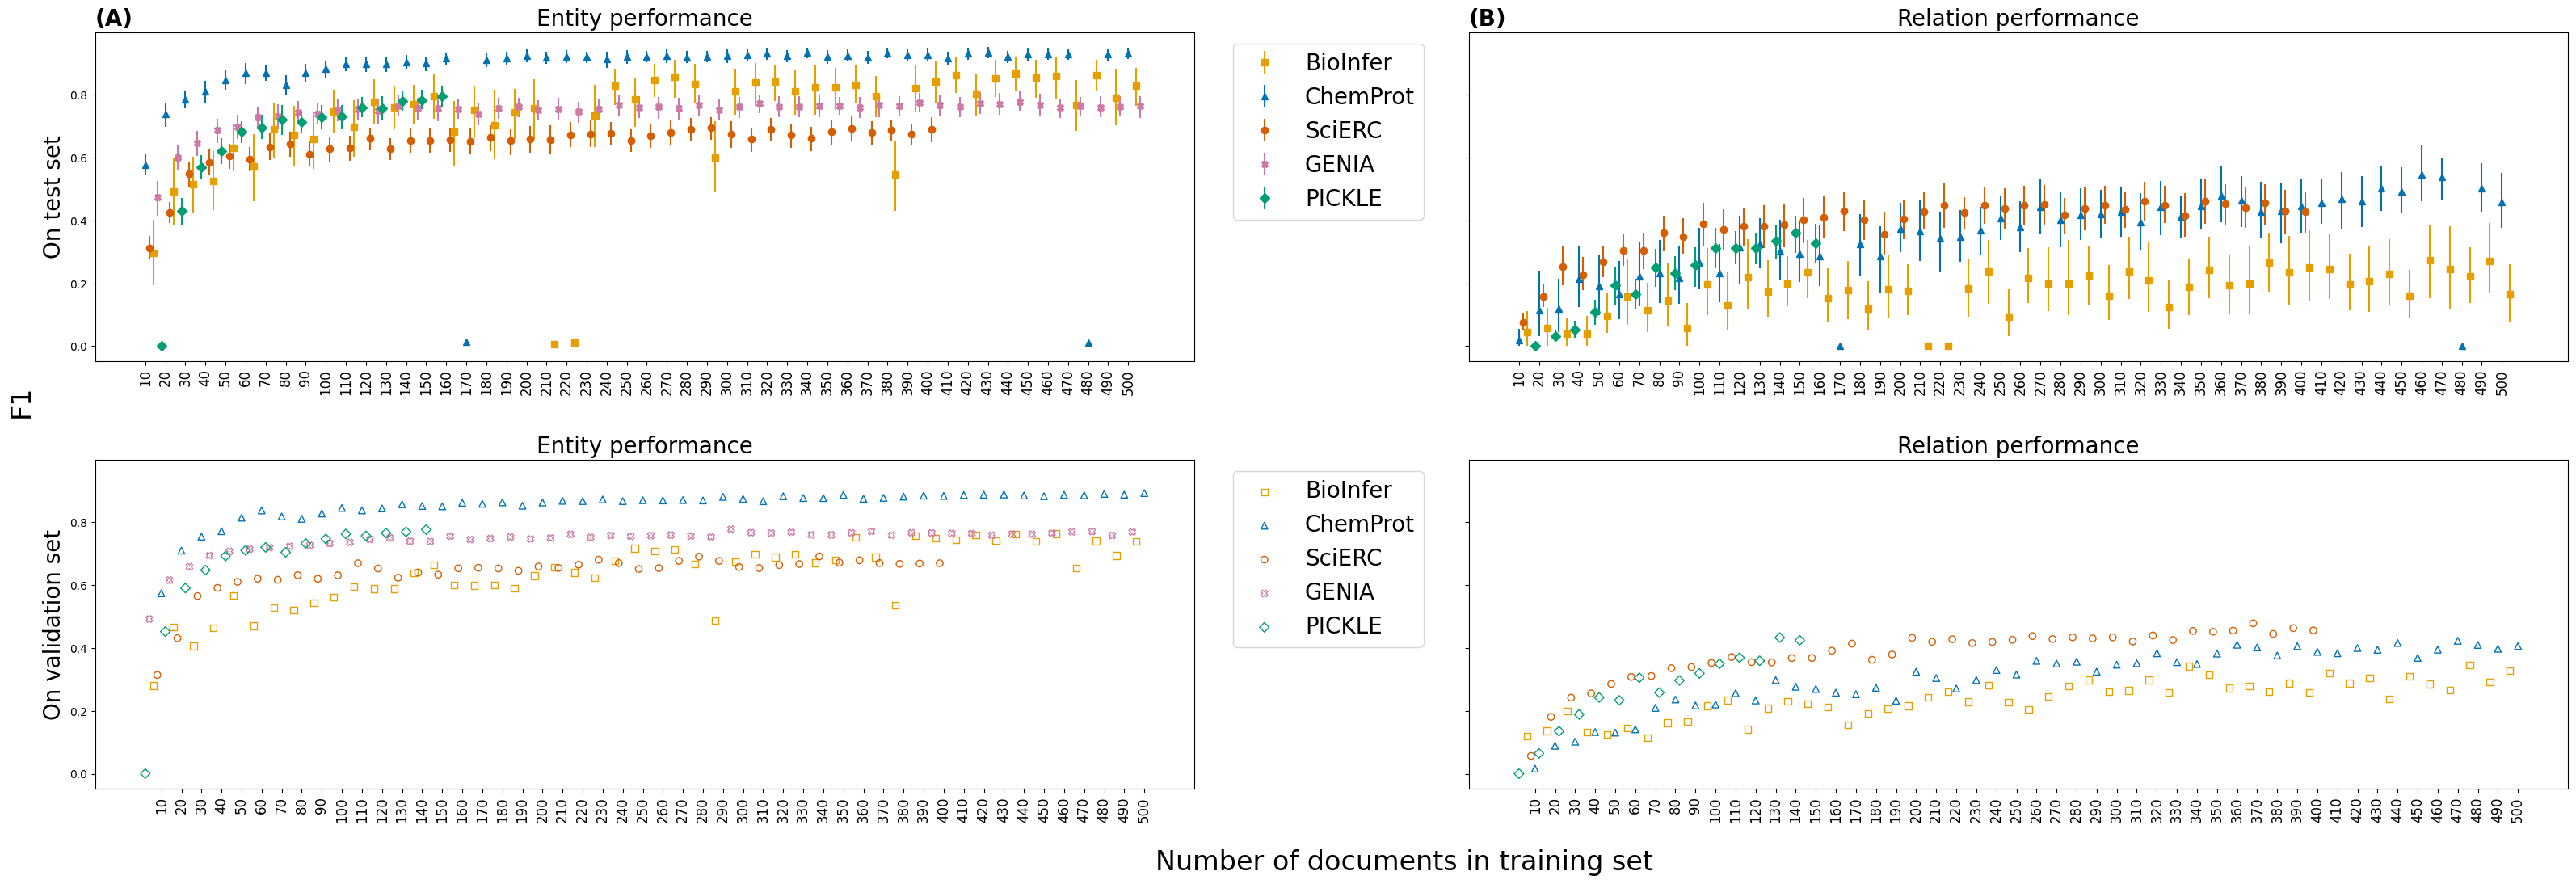

In [21]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=False, figsize=(36, 12))

# Colors from the IBM palette
colors = {'chemprot': '#0072B2',
         'scierc': '#D55E00',
         'bioinfer': '#E69F00',
         'genia': '#CC79A7',
         'pickle': '#009E73'}
offset = {'chemprot': 0,
         'scierc': 2,
         'bioinfer': 4,
         'genia': 6,
         'pickle': 8}
labels = {'chemprot': 'ChemProt',
         'scierc': 'SciERC',
         'bioinfer': 'BioInfer',
         'genia': 'GENIA',
         'pickle': 'PICKLE'}
markers = {'chemprot': '^',
         'scierc': 'o',
         'bioinfer': 's',
         'genia': 'X',
         'pickle': 'D'}

x = np.arange(0,500,10)
name_x = [str(int(i+10)) for i in x]

for dset_name in test_perf_dfs.keys():
    # Get data for this dataset
    test_df = test_perf_dfs[dset_name]
    val_df = val_perf_dfs[dset_name]
    # Plot entity performance
    ent_CIs = test_df.ent_F1_CI.apply(lambda x: literal_eval(str(x)))
    ent_CIs = pd.DataFrame([[test_df['ent_F1'][i] - val[0] for i, val in enumerate(ent_CIs)], [val[1] - test_df['ent_F1'][i] for i, val in enumerate(ent_CIs)]])
    axs[0,0].errorbar(x + offset[dset_name], test_df['ent_F1'], yerr=ent_CIs.to_numpy(), fmt=markers[dset_name], color=colors[dset_name], label=f'{labels[dset_name]}')   
    axs[1,0].scatter(x - offset[dset_name], val_df['ent_F1'], color=colors[dset_name], marker=markers[dset_name], facecolor='none', label=f'{labels[dset_name]}')
    # Plot relation performance
    rel_CIs = test_df.rel_F1_CI.apply(lambda x: literal_eval(str(x)))
    rel_CIs = pd.DataFrame([[test_df['rel_F1'][i] - val[0] for i, val in enumerate(rel_CIs)], [val[1] - test_df['rel_F1'][i] for i, val in enumerate(rel_CIs)]])
    axs[0,1].errorbar(x + offset[dset_name], test_df['rel_F1'], yerr=rel_CIs.to_numpy(), fmt=markers[dset_name], color=colors[dset_name], label=f'{labels[dset_name]}')
    axs[1,1].scatter(x - offset[dset_name], val_df['rel_F1'], color=colors[dset_name], marker=markers[dset_name], facecolor='none', label=f'{labels[dset_name]}')
    
axs[0,0].set_xticks(x, name_x, size=12, rotation=90)
axs[0,0].set_title('(A)', fontsize='20', fontweight='bold', loc='left')
axs[0,1].set_xticks(x, name_x, size=12, rotation=90)
axs[0,1].set_title('(B)', fontsize='20', fontweight='bold', loc='left')
axs[1,0].set_xticks(x, name_x, size=12, rotation=90)
axs[1,1].set_xticks(x, name_x, size=12, rotation=90)
axs[0,0].set_title('Entity performance', size=20)
axs[0,1].set_title('Relation performance', size=20)
axs[1,0].set_title('Entity performance', size=20)
axs[1,1].set_title('Relation performance', size=20)
axs[0,0].set_ylabel('On test set', size=20)
axs[1,0].set_ylabel('On validation set', size=20)
axs[0,0].legend(bbox_to_anchor=(1.025,1), fontsize=20)
axs[1,0].legend(bbox_to_anchor=(1.025,1), fontsize=20)
fig.supxlabel('Number of documents in training set', size=24)
fig.supylabel('F1', size=24)
fig.subplots_adjust(bottom=0.1, left=0.05, wspace=0.25, hspace=0.3)
plt.savefig('../data/straying_off_topic_data/final_figures_PICKLE/figure_3.png', format='png', bbox_inches='tight', dpi=600)

This plot is very visually overwhelming, so we want to simplify it. To do this, we'll make two separate plots, one for 10-150 by 10s, and one from 50-500 by 50s.

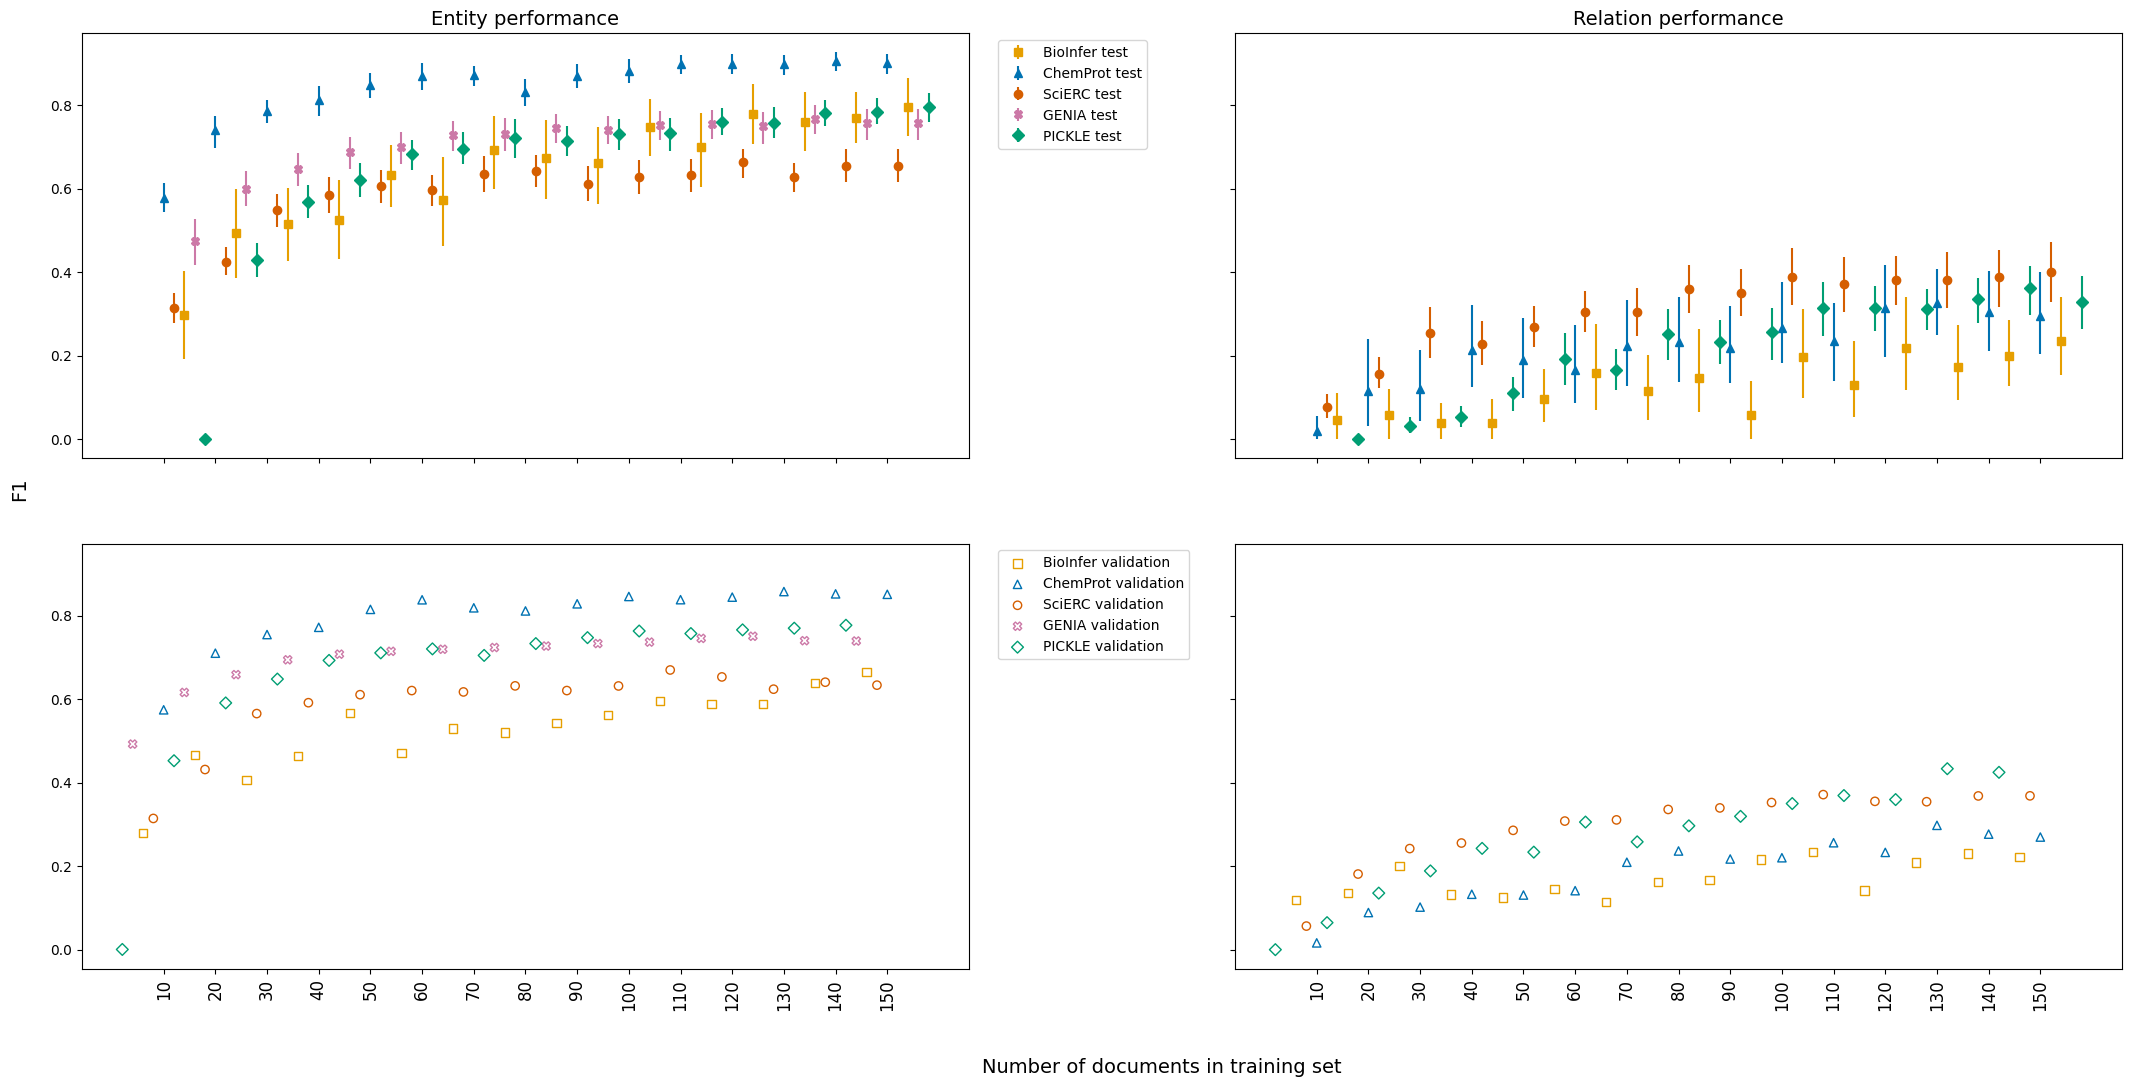

In [46]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(24, 12))

# Colors from the IBM palette
colors = {'chemprot': '#0072B2',
         'scierc': '#D55E00',
         'bioinfer': '#E69F00',
         'genia': '#CC79A7',
         'pickle': '#009E73'}
offset = {'chemprot': 0,
         'scierc': 2,
         'bioinfer': 4,
         'genia': 6,
         'pickle': 8}
labels = {'chemprot': 'ChemProt',
         'scierc': 'SciERC',
         'bioinfer': 'BioInfer',
         'genia': 'GENIA',
         'pickle': 'PICKLE'}

x = np.arange(0,150,10)
name_x = [str(int(i+10)) for i in x]

for dset_name in test_perf_dfs.keys():
    # Get data for this dataset
    test_df = test_perf_dfs[dset_name].loc[:14,:]
    val_df = val_perf_dfs[dset_name].loc[:14,:]
    # Plot entity performance
    ent_CIs = test_df.ent_F1_CI.apply(lambda x: literal_eval(str(x)))
    ent_CIs = pd.DataFrame([[test_df['ent_F1'][i] - val[0] for i, val in enumerate(ent_CIs)], [val[1] - test_df['ent_F1'][i] for i, val in enumerate(ent_CIs)]])
    axs[0,0].errorbar(x + offset[dset_name], test_df['ent_F1'], yerr=ent_CIs.to_numpy(), fmt=markers[dset_name], color=colors[dset_name], label=f'{labels[dset_name]} test')   
    axs[1,0].scatter(x - offset[dset_name], val_df['ent_F1'], color=colors[dset_name], marker=markers[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    # Plot relation performance
    rel_CIs = test_df.rel_F1_CI.apply(lambda x: literal_eval(str(x)))
    rel_CIs = pd.DataFrame([[test_df['rel_F1'][i] - val[0] for i, val in enumerate(rel_CIs)], [val[1] - test_df['rel_F1'][i] for i, val in enumerate(rel_CIs)]])
    axs[0,1].errorbar(x + offset[dset_name], test_df['rel_F1'], yerr=rel_CIs.to_numpy(), fmt=markers[dset_name], color=colors[dset_name], label=f'{labels[dset_name]} test')
    axs[1,1].scatter(x - offset[dset_name], val_df['rel_F1'], color=colors[dset_name], marker=markers[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    
axs[0,0].set_xticks(x, name_x, size=12, rotation=90)
axs[0,1].set_xticks(x, name_x, size=12, rotation=90)
axs[1,0].set_xticks(x, name_x, size=12, rotation=90)
axs[1,1].set_xticks(x, name_x, size=12, rotation=90)
axs[0,0].set_title('Entity performance', size=14)
axs[0,1].set_title('Relation performance', size=14)
axs[0,0].legend(bbox_to_anchor=(1.025,1))
axs[1,0].legend(bbox_to_anchor=(1.025,1))
fig.supxlabel('Number of documents in training set', size=14)
fig.supylabel('F1', size=14)
fig.subplots_adjust(bottom=0.1, left=0.05, wspace=0.3)
plt.savefig('../data/straying_off_topic_data/corpus_size_analysis/ten_to_150_fig.png', format='png', bbox_inches='tight', dpi=600)

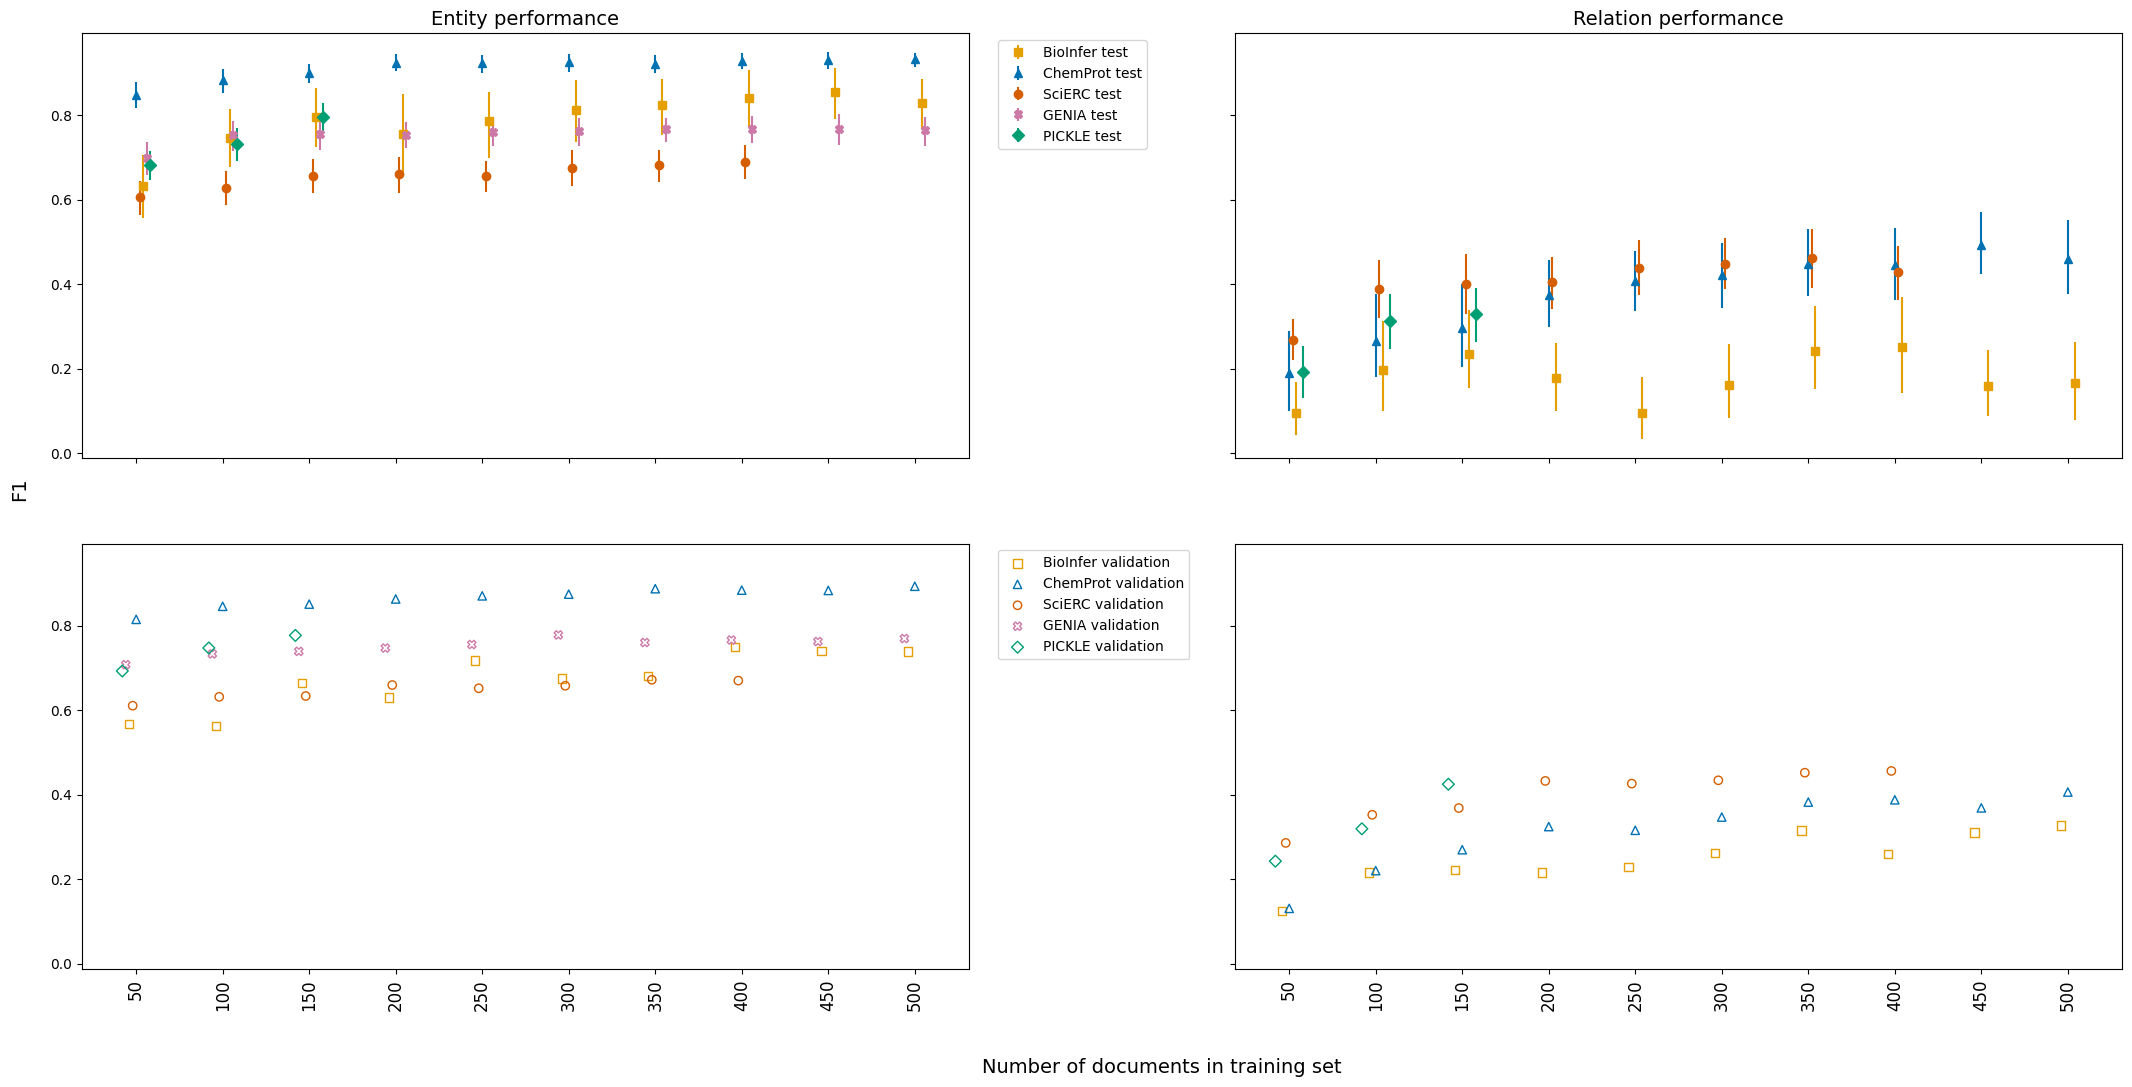

In [45]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(24, 12))

# Colors from the IBM palette
colors = {'chemprot': '#0072B2',
         'scierc': '#D55E00',
         'bioinfer': '#E69F00',
         'genia': '#CC79A7',
         'pickle': '#009E73'}
offset = {'chemprot': 0,
         'scierc': 2,
         'bioinfer': 4,
         'genia': 6,
         'pickle': 8}
labels = {'chemprot': 'ChemProt',
         'scierc': 'SciERC',
         'bioinfer': 'BioInfer',
         'genia': 'GENIA',
         'pickle': 'PICKLE'}

x = np.arange(0,500,50)
name_x = [str(int(i+50)) for i in x]

for dset_name in test_perf_dfs.keys():
    # Get data for this dataset
    test_df = test_perf_dfs[dset_name].loc[test_perf_dfs[dset_name]['docnum']%50 == 0].reset_index(drop=True)
    val_df = val_perf_dfs[dset_name].loc[val_perf_dfs[dset_name]['docnum']%50 == 0].reset_index(drop=True)
    # Plot entity performance
    ent_CIs = test_df.ent_F1_CI.apply(lambda x: literal_eval(str(x)))
    ent_CIs = pd.DataFrame([[test_df['ent_F1'][i] - val[0] for i, val in enumerate(ent_CIs)], [val[1] - test_df['ent_F1'][i] for i, val in enumerate(ent_CIs)]])
    axs[0,0].errorbar(x + offset[dset_name], test_df['ent_F1'], yerr=ent_CIs.to_numpy(), fmt=markers[dset_name], color=colors[dset_name], label=f'{labels[dset_name]} test')   
    axs[1,0].scatter(x - offset[dset_name], val_df['ent_F1'], color=colors[dset_name], marker=markers[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    # Plot relation performance
    rel_CIs = test_df.rel_F1_CI.apply(lambda x: literal_eval(str(x)))
    rel_CIs = pd.DataFrame([[test_df['rel_F1'][i] - val[0] for i, val in enumerate(rel_CIs)], [val[1] - test_df['rel_F1'][i] for i, val in enumerate(rel_CIs)]])
    axs[0,1].errorbar(x + offset[dset_name], test_df['rel_F1'], yerr=rel_CIs.to_numpy(), fmt=markers[dset_name], color=colors[dset_name], label=f'{labels[dset_name]} test')
    axs[1,1].scatter(x - offset[dset_name], val_df['rel_F1'], color=colors[dset_name], marker=markers[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    
axs[0,0].set_xticks(x, name_x, size=12, rotation=90)
axs[0,1].set_xticks(x, name_x, size=12, rotation=90)
axs[1,0].set_xticks(x, name_x, size=12, rotation=90)
axs[1,1].set_xticks(x, name_x, size=12, rotation=90)
axs[0,0].set_title('Entity performance', size=14)
axs[0,1].set_title('Relation performance', size=14)
axs[0,0].legend(bbox_to_anchor=(1.025,1))
axs[1,0].legend(bbox_to_anchor=(1.025,1))
fig.supxlabel('Number of documents in training set', size=14)
fig.supylabel('F1', size=14)
fig.subplots_adjust(bottom=0.1, left=0.05, wspace=0.3)
plt.savefig('../data/straying_off_topic_data/corpus_size_analysis/150_to_500_by_50s_fig.png', format='png', bbox_inches='tight', dpi=600)